In [95]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [84]:
# file = open("data/IR-assignment-2-data.txt", 'r')
# lines = file.readlines()
# query_url_pairs = []
# for idx, line in enumerate(lines):
#     line_toks = line.split()
#     qid = line_toks[1]
#     if(qid == 'qid:4'):
#         query_url_pair_idx = idx
#         relevance_label = int(line_toks[0])
#         query_url_pairs.append((query_url_pair_idx, relevance_label))

In [85]:
def readData(file_path):
    file = open(file_path, 'r')
    lines = file.readlines()
    query_url_pairs = []
    for idx, line in enumerate(lines):
        line_toks = line.split()
        qid = line_toks[1]
        if(qid == 'qid:4'):
            query_url_pair_idx = idx
            relevance_label = int(line_toks[0])
            data_row = line
            query_url_pairs.append((query_url_pair_idx, relevance_label, data_row))
    return query_url_pairs

In [86]:
def make_max_dcg_file(query_url_pairs):
    reverse_sorted_by_relevance = sorted(query_url_pairs, key=lambda x: x[1], reverse=True)
    counts_by_relevance_label = {0 : 0, 1 : 0, 2 : 0, 3 : 0, 4 : 0}
    max_dcg_file_lines = []
    for qpr in query_url_pairs:
        counts_by_relevance_label[qpr[1]] += 1
        max_dcg_file_lines.append(qpr[2])
    file_name = "max_dcg_file.txt"
    # with open(file)
    with open(file_name, 'w') as f:
        f.writelines(max_dcg_file_lines)
    num_max_dcg_files = 1
    for lab in counts_by_relevance_label.keys():
        num_max_dcg_files *= math.factorial(counts_by_relevance_label[lab])
    
    return file_name, reverse_sorted_by_relevance, num_max_dcg_files

In [87]:
def compute_DCG(qu_pairs_data):
    dcg_value = qu_pairs_data[0][1]
    # print(len(qu_pairs_data))
    for i in range(1, len(qu_pairs_data)):
        # print(i)
        dcg_value += (qu_pairs_data[i][1] / np.log2(i + 1))
    return dcg_value


In [88]:
def compute_nDCG(original_qu_pairs, sorted_qu_pairs, p):
    dcg_p = compute_DCG(original_qu_pairs[:p])
    idcg_p = compute_DCG(sorted_qu_pairs[:p])
    ncdg_p = dcg_p / idcg_p
    return ncdg_p

Part 1,2,3

In [89]:
file_path = "data/IR-assignment-2-data.txt"
query_url_pairs = readData(file_path)
num_data = len(query_url_pairs)
max_dcg_file_name, sorted_qu_pairs, num_max_dcg_files = make_max_dcg_file(query_url_pairs)
p_values = [50, num_data]
for p in p_values:
    nDCG_p = compute_nDCG(query_url_pairs, sorted_qu_pairs, p)
    print(f"nDCG at {p if p==50 else 'whole dataset'} : {nDCG_p}")

nDCG at 50 : 0.3521042740324887
nDCG at whole dataset : 0.5979226516897831


Part 4

In [90]:
# query_url_pairs[0][2].split()[76].split(':')[1]
qu_pairs_with_tf_idf_sum = []
for qu_pair in query_url_pairs:
    sum_tf_idf_doc = float(qu_pair[2].split()[76].split(':')[1])
    qu_pairs_with_tf_idf_sum.append((qu_pair[0], qu_pair[1], sum_tf_idf_doc, qu_pair[2]))


In [91]:
ranked_qu_pairs = sorted(qu_pairs_with_tf_idf_sum, key=lambda x : x[2], reverse=True)

In [92]:
precision_k = []
recall_k = []
relevant_at_k = 0
total_relevant = 0
for rqpr in ranked_qu_pairs:
    if(rqpr[1] != 0):
        total_relevant += 1
for i in range(len(ranked_qu_pairs)):
    if(ranked_qu_pairs[i][1] != 0):
        relevant_at_k += 1
    p_k = relevant_at_k / (i + 1)
    r_k = relevant_at_k / total_relevant
    precision_k.append(p_k)
    recall_k.append(r_k)

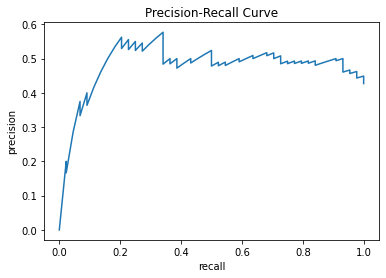

In [100]:
plt.plot(recall_k, precision_k)
plt.ylabel("precision")
plt.xlabel("recall")
plt.title("Precision-Recall Curve")
plt.show()